In [1]:
import matplotlib
import numpy as np
from skimage.transform import warp
from skimage import transform
from PIL import Image
from numpy.linalg import inv

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import ginput
from matplotlib.backend_bases import MouseButton

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
img = np.asarray(Image.open('newyork3.jpg'))

In [3]:
plt.imshow(img)

#pts_src = plt.ginput(4, show_clicks=True, mouse_add=MouseButton.LEFT, mouse_pop=MouseButton.RIGHT, mouse_stop=MouseButton.MIDDLE)

pts_src1 = np.array([[1959,1050],
                    [2657,913],
                    [2693,1769],
                    [1951,1800]])

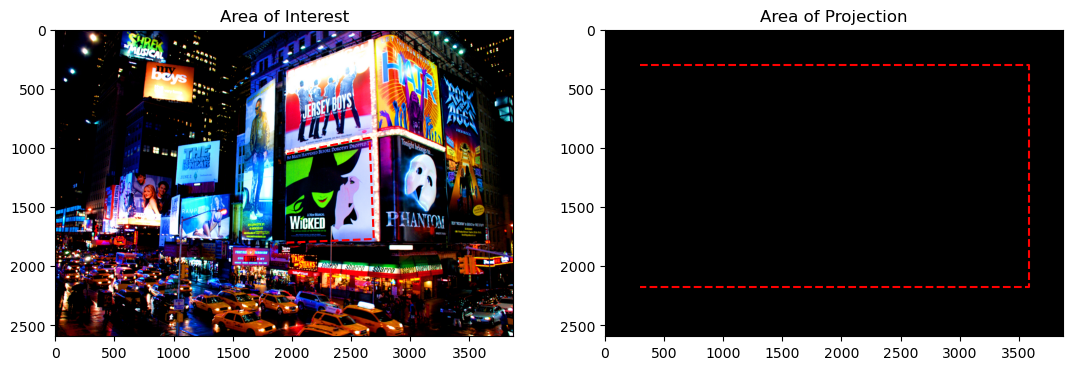

In [4]:
%matplotlib inline
pts_src1 = np.round_(pts_src1)

length = ((max(pts_src1[:,0]) - min(pts_src1[:,0])) * 2) +1800
width = ((max(pts_src1[:,1]) - min(pts_src1[:,1])) * 2) +100

x_st = 300
y_st = 300

pts_dst = np.array([[x_st,x_st],
                    [length+x_st,y_st],
                    [length+x_st,width+y_st],
                    [x_st,width+y_st]])


fig, ax = plt.subplots(1,2, figsize=(13,6))
    
projection = np.zeros_like(img)
ax[0].imshow(img)
ax[0].plot(pts_src1[:,0], pts_src1[:,1], 'r--')
ax[0].set_title('Area of Interest')
ax[1].imshow(projection)
ax[1].plot(pts_dst[:,0], pts_dst[:,1], 'r--')
ax[1].set_title('Area of Projection')
plt.show()


In [5]:
def find_H(pts_src, pts_dst):
    A = find_A(pts_src, pts_dst)
    U,sigma,V = np.linalg.svd(A)
    return V[:,len(V[0])-1].reshape(3,3)
    
def find_A(pts_src, pts_dst):
    num_points = pts_src.shape[0]

    A = []
    
    for i in range(num_points):
        rowOfPairPoints = find_rowOfPairPoints(pts_src[i], pts_dst[i])
        A.append(rowOfPairPoints)
    return np.concatenate(A, axis=0)

def find_rowOfPairPoints(pts_src, pts_dst):
    x, y = pts_src[0], pts_src[1]
    x_t, y_t = pts_dst[0], pts_dst[1]

    A_partial = np.array([
        [-x,-y,-1,0,0,0,x_t*x,x_t*y,x_t],
        [0,0,0,-x,-y,-1,y_t*x,y_t*y,y_t]
    ])
    return A_partial

In [6]:
H = find_H(pts_src1,pts_dst)

<bound method ProjectiveTransform.inverse of <ProjectiveTransform(matrix=
    [[ 1.12465082e+01,  1.66261824e-01, -2.15884683e+04],
     [ 1.20604698e+00,  5.49576714e+00, -7.51518528e+03],
     [ 4.55795066e-04,  1.59192046e-04,  1.00000000e+00]]) at 0x21362a112b0>>
<ProjectiveTransform(matrix=
    [[ 1.12465082e+01,  1.66261824e-01, -2.15884683e+04],
     [ 1.20604698e+00,  5.49576714e+00, -7.51518528e+03],
     [ 4.55795066e-04,  1.59192046e-04,  1.00000000e+00]])>


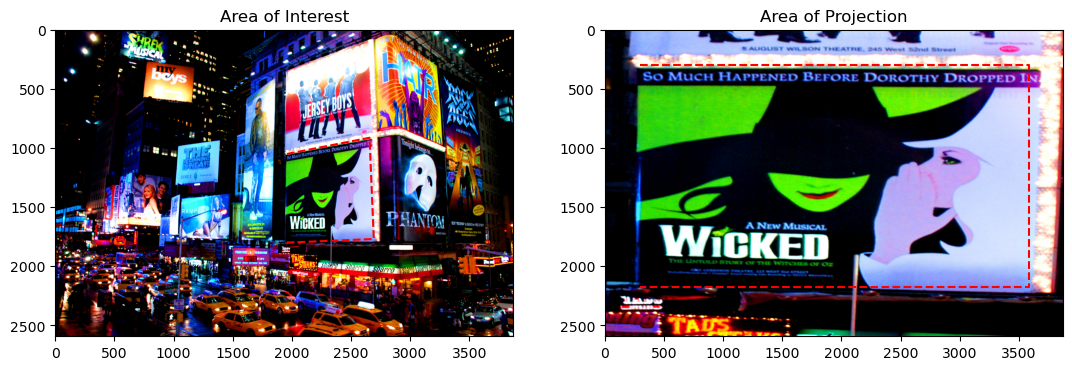

In [7]:
%matplotlib inline
tform = transform.estimate_transform('projective', np.array(pts_src1),np.array(pts_dst))
print(tform.inverse)
print(tform)
transformed = warp(img,tform.inverse)

fig, ax = plt.subplots(1,2, figsize=(13,6))
ax[0].imshow(img)
ax[0].plot(pts_src1[:,0], pts_src1[:,1], 'r--')
ax[0].set_title('Area of Interest')
ax[1].imshow(transformed)
ax[1].plot(pts_dst[:,0], pts_dst[:,1], 'r--')
ax[1].set_title('Area of Projection')
plt.show()

In [8]:
'''''
plt.set_xlim(-5, length+5)
plt.set_ylim(-5, width+5)
plt.show()
'''''

"''\nplt.set_xlim(-5, length+5)\nplt.set_ylim(-5, width+5)\nplt.show()\n"